<a href="https://colab.research.google.com/github/Jit562/SQL_Pandas_Analysis/blob/main/SQL_PANDAS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libarary


In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data/el_result_2024.csv', encoding = 'unicode_escape')

In [16]:
df1 = pd.read_csv('/content/drive/MyDrive/Data/Copy of Store.csv', encoding = 'unicode_escape')

In [17]:
df2 = pd.read_csv('/content/drive/MyDrive/Data/employees.csv', encoding = 'unicode_escape')

In [19]:
df3 = pd.read_csv('/content/drive/MyDrive/Data/Auto Sales data.csv', encoding = 'unicode_escape')

In [10]:
df.shape

(542, 8)

## Connect with sql and data base

In [7]:
conn = sqlite3.connect('store.db')

## Create the table using dataset

In [8]:
df.to_sql('election', conn, if_exists = 'replace', index = False)

542

In [20]:
df1.to_sql('store', conn, if_exists = 'replace', index = False)
df2.to_sql('employee', conn, if_exists = 'replace', index = False)
df3.to_sql('auto_sale', conn, if_exists = 'replace', index = False)

2747

In [21]:
# close the table

conn.close

<function Connection.close()>

In [22]:
# Open the db
conn = sqlite3.connect('store.db')
conn.commit()

## Connect cursor and check the table available innthe database

In [23]:
cursor = conn.cursor()
cursor.execute(''' select name from sqlite_master where type = 'table' ''')
print('List of the table name ')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of the table name 


['election', 'store', 'employee', 'auto_sale']

## Start sql query here........

In [26]:
pd.read_sql_query('''

   select * from store limit 2

''', conn)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3.2896,2013,old customer,Not Returned,Not Returned
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,2.3568,2013,old customer,Not Returned,Not Returned


In [29]:
pd.read_sql_query('''
    select * from election limit 2
''', conn)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared


In [30]:
pd.read_sql_query('''

     select * from employee limit 2
''', conn)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,1,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,1,None


In [31]:
pd.read_sql_query('''

    select * from auto_sale limit 2

''', conn)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small


## ** --Find Top Reasons for returning.**

In [32]:
pd.read_sql_query('''

   select * from store limit 2

''', conn)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_Name,Sales,Quantity,Discount,Profit,Discount_Amount,Years,Customer_Duration,Returned_Items,Return_Reason
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,3.2896,2013,old customer,Not Returned,Not Returned
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,2.3568,2013,old customer,Not Returned,Not Returned


In [41]:
pd.read_sql_query('''

select count(Row_ID) as Id_count, Return_Reason from store
where Return_Reason !='Not Returned'
group by Return_Reason
order by count(Row_ID) desc
limit 5

 ''', conn)

,Id_count,Return_Reason
0,304,Product Description Inaccurate
1,158,Customer Dissatified With Product
2,100,Product Arrived After Promised Delivery Date
3,90,Product Damaged
4,81,Product Ordered Accidently


In [42]:
return_reason = pd.read_sql_query('''

select count(Row_ID) as Id_count, Return_Reason from store
where Return_Reason !='Not Returned'
group by Return_Reason
order by count(Row_ID) desc
limit 5

 ''', conn)

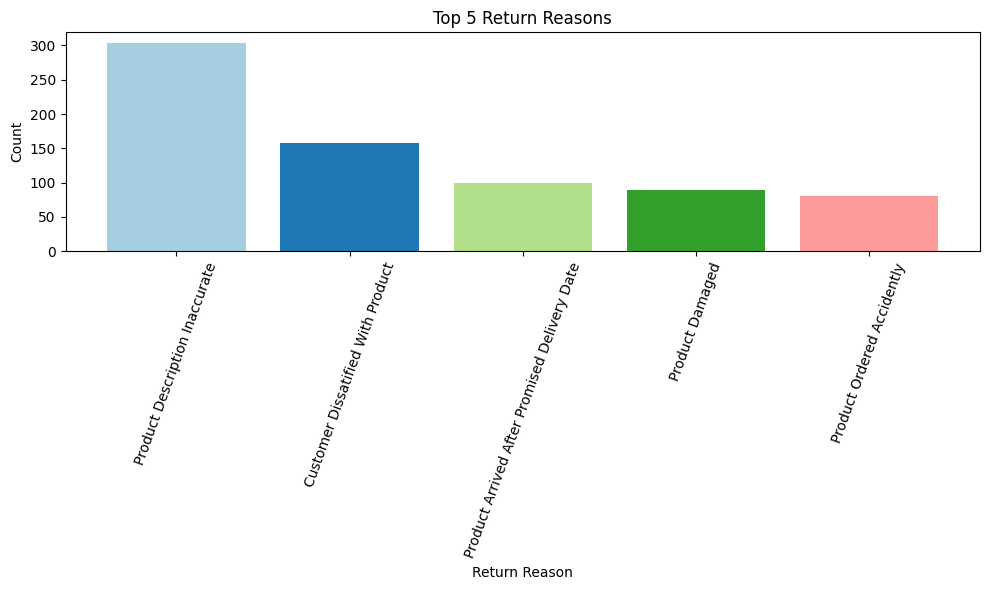

In [67]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(return_reason['Return_Reason'], return_reason['Id_count'], color=plt.cm.Paired.colors)
plt.xlabel('Return Reason')
plt.ylabel('Count')
plt.title('Top 5 Return Reasons')
plt.xticks(rotation=70)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

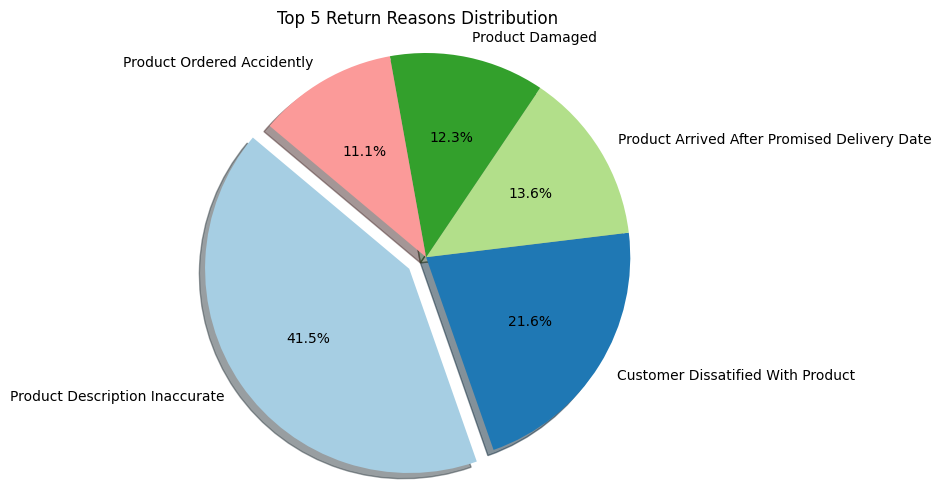

In [102]:
# Create a pie chart
plt.figure(figsize=(6, 6))
explode = (0.1, 0, 0, 0, 0)
plt.pie(return_reason['Id_count'], labels=return_reason['Return_Reason'], autopct='%1.1f%%', shadow=True, explode=explode, startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Return Reasons Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Find Top 10 Customers Returned Frequently

In [73]:
pd.read_sql_query('''

  select count(Return_Reason), Customer_Name from store
  group by Customer_Name
  having Return_Reason != 'Not Returned'
  order by count(Return_Reason) desc
  limit 10

''', conn)

,count(Return_Reason),Customer_Name
0,30,Lena Cacioppo
1,26,Steven Cartwright
2,25,Noel Staavos
3,21,Dean Braden
4,20,Darrin Martin
5,19,Cynthia Voltz
6,18,Ted Butterfield
7,18,Helen Andreada
8,18,Eugene Hildebrand
9,16,Nat Gilpin


In [76]:
customer_return = pd.read_sql_query('''

  select count(Return_Reason) as return_count, Customer_Name from store
  group by Customer_Name
  having Return_Reason != 'Not Returned'
  order by count(Return_Reason) desc
  limit 10

''', conn)

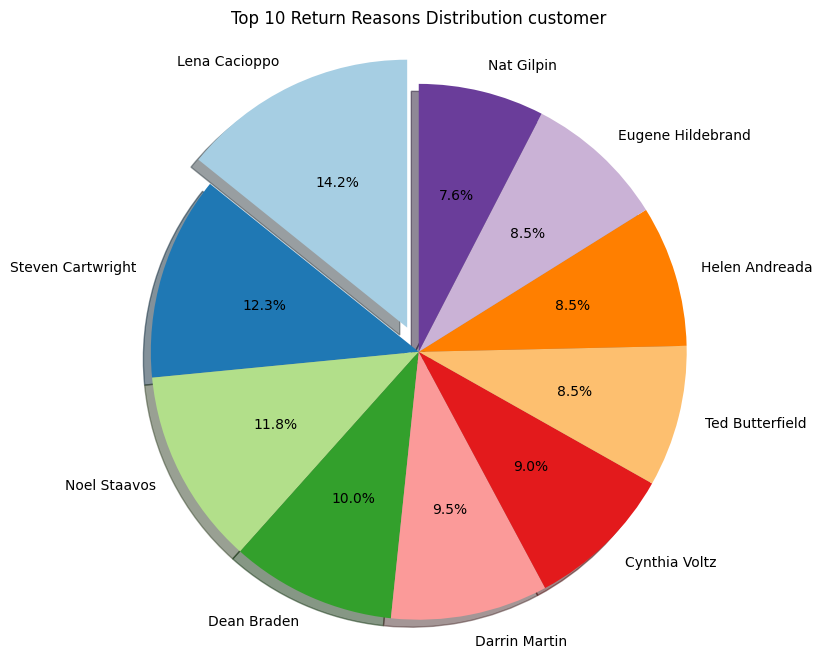

In [99]:
# Create a pie chart
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(customer_return['return_count'], labels=customer_return['Customer_Name'], shadow=True, autopct='%1.1f%%', explode=explode, startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Return Reasons Distribution customer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Check whether new customers are returning higher or not

In [82]:
pd.read_sql_query('''

select count(Returned_Items) as items_count, Customer_Duration from store
group by Customer_Duration, Returned_Items
having Returned_Items !='Not Returned'
order by items_count desc

''', conn)

,items_count,Customer_Duration
0,796,old customer
1,4,new customer


In [83]:
customer = pd.read_sql_query('''

select count(Returned_Items) as items_count, Customer_Duration from store
group by Customer_Duration, Returned_Items
having Returned_Items !='Not Returned'
order by items_count desc

''', conn)

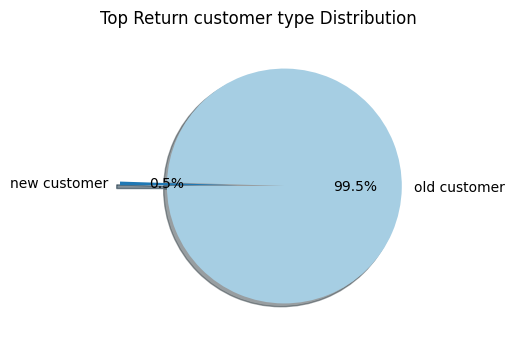

In [94]:
# Create a pie chart
plt.figure(figsize=(4, 4))
explode = (0, 0.4)
plt.pie(customer['items_count'], labels=customer['Customer_Duration'], shadow = True, autopct='%1.1f%%', explode=explode , startangle=180, colors=plt.cm.Paired.colors)
plt.title('Top Return customer type Distribution ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Find the Years by Sales and Profit

In [109]:
# Segment

pd.read_sql_query('''

select Sales, Profit, Years from store

group by Segment


''', conn)

,Sales,Profit,Years
0,16.448,5.5512,2013
1,12.780,5.2398,2013
2,11.784,4.2717,2013


In [115]:
x = pd.read_sql_query('''

select Sales, Profit, Years, Segment from store

group by Segment


''', conn)

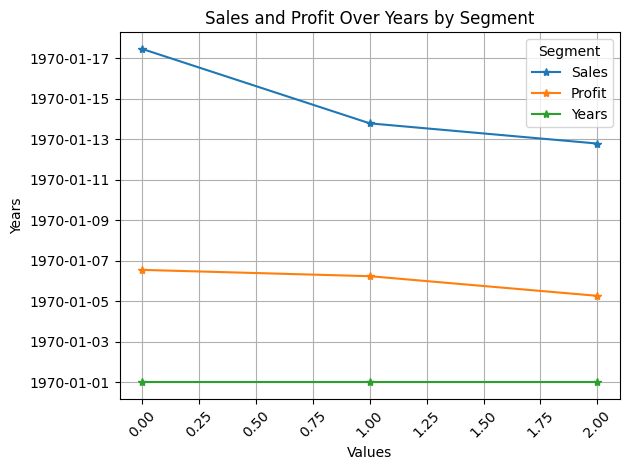

In [134]:
x.plot(kind='line', marker='*')


# Customize the plot
plt.xlabel('Values')
plt.ylabel('Years')
plt.title('Sales and Profit Over Years by Segment')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.grid()
# Show plot
plt.show()
